# Загрузка данных

In [123]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/athletes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [124]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# 1 Преобразуйте данные:

## 1.1 Проверка наличия пропущенных значений

In [ ]:
# Удалим из датасэта колонки с проусками
df = df[~(df["height"].isna()) & ~(df["weight"].isna()) & ~(df["dob"].isna())]

In [126]:
# Проверка значений типа "?", "-" и тд

In [127]:
df["sex"].value_counts()

sex
male      5862
female    4996
Name: count, dtype: int64

In [128]:
df[["nationality"]].sort_values(by="nationality").head()

,nationality
51,AFG
5400,AFG
7682,AFG
3196,ALB
6439,ALB


In [129]:
df["sport"].value_counts()

sport
athletics            2187
aquatics             1396
football              583
rowing                535
cycling               502
hockey                432
volleyball            382
shooting              380
judo                  377
sailing               372
wrestling             349
handball              349
canoe                 327
gymnastics            319
rugby sevens          296
basketball            284
weightlifting         258
fencing               245
equestrian            215
tennis                191
table tennis          168
badminton             164
archery               126
taekwondo             125
golf                  115
triathlon             109
modern pentathlon      72
Name: count, dtype: int64

In [130]:
# Значений данного типа в nationality, sex, sport нет.

## 1.2 закодируйте категориальные переменные числовыми значениями

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
X = pd.get_dummies(df, columns=["nationality", "sport"])
X = X.drop(["id", "name", "sex", "dob"], axis=1)

X.head()

,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,0,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
le = LabelEncoder()
le.fit(df["sex"])

y = pd.Series(le.transform(df["sex"]))
y.head()


0    1
1    0
2    1
3    1
4    1
dtype: int64

# 2. Разделите выборку

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [136]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [137]:
predictions = model.predict_proba(X_test)

In [138]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8460741422979507, 0.8328729281767956)

# 3. ROC

In [139]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])

In [141]:
fpr_r, tpr_r, th_r = roc_curve(y_test, np.zeros(len(y_test)))

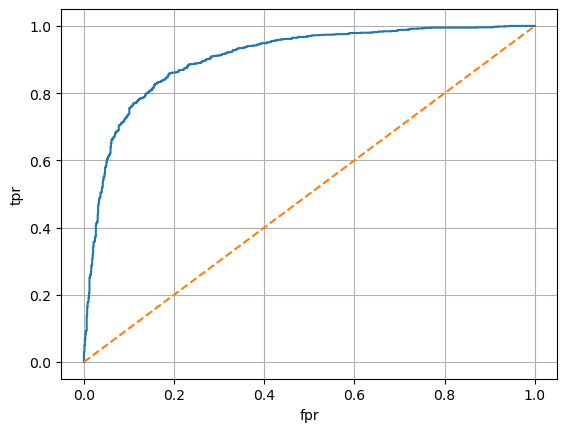

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr_r, tpr_r, "--")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.show()

# 4. ROC-AUC

In [143]:
from sklearn.metrics import roc_auc_score

In [144]:
roc_auc = roc_auc_score(y_test, predictions[:, 1])
roc_auc

0.9055275827379485

# 5. TPR, FPR

In [ ]:
def calculate(predictions, y_test, thresholds):
    tp = []
    fp = []
    tn = []
    fn = []

    for threshold in thresholds:
        pred = np.where(predictions >= threshold, 1, 0)

        tp.append(np.sum((pred == 1) & (y_test == 1)))
        fp.append(np.sum((pred == 1) & (y_test == 0)))
        tn.append(np.sum((pred == 0) & (y_test == 0)))
        fn.append(np.sum((pred == 0) & (y_test == 1)))

    return tp, fp, tn, fn

In [146]:
fpr_m = []
tpr_m = []

tp, fp, tn, fn = calculate(
    predictions[:, 1], y_test, np.linspace(0, 1, len(predictions))
)

for i in range(len(tp)):
    tpr_m.append(tp[i] / (tp[i] + fn[i]))
    fpr_m.append(fp[i] / (fp[i] + tn[i]))

# 6. ROC-кривая

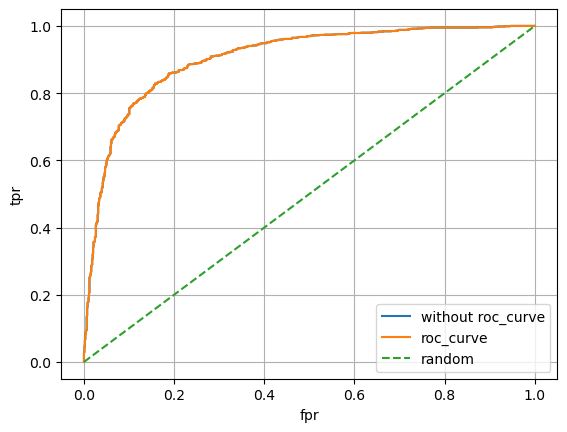

In [147]:
plt.plot(fpr_m, tpr_m, label="without roc_curve")
plt.plot(fpr, tpr, label="roc_curve")
plt.plot(fpr_r, tpr_r, "--", label="random")
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.show()

# 7. График Precision-Recall

In [148]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision_m = []

for i in range(len(tp)):
    precision_m.append(tp[i] / (tp[i] + fp[i]))

/var/folders/wj/39pc9_hs0fn1fz3pbrj_zphr0000gn/T/ipykernel_95233/2601553892.py:4: RuntimeWarning: invalid value encountered in scalar divide
  precision_m.append(tp[i] / (tp[i] + fp[i]))


In [150]:
precision, recall, _ = precision_recall_curve(y_test, predictions[:, 1])

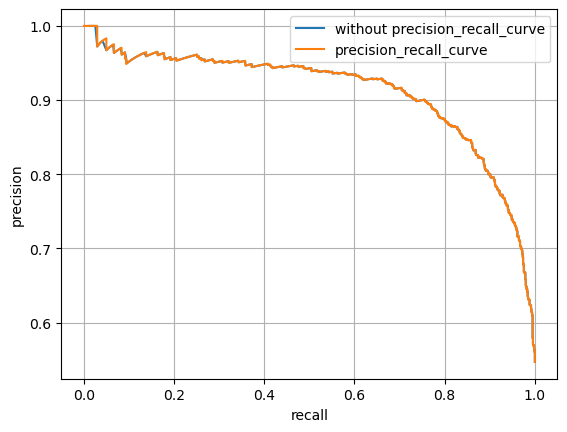

In [ ]:
plt.plot(tpr_m, precision_m, label="without precision_recall_curve")
plt.plot(recall, precision, label="precision_recall_curve")
plt.legend()
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()
plt.show()

# 8. ROC-AUC

In [152]:
from sklearn.metrics import auc

In [153]:
roc_auc_m = auc(fpr_m, tpr_m)

In [154]:
roc_auc_m - roc_auc

-2.1385946182839177e-06

# 9. Выводы

In [ ]:
tp = np.sum((predictions[:, 1] >= 0.5) & (y_test == 1))
fp = np.sum((predictions[:, 1] >= 0.5) & (y_test == 0))
tn = np.sum((predictions[:, 1] < 0.5) & (y_test == 0))
fn = np.sum((predictions[:, 1] < 0.5) & (y_test == 1))

print(f"accurancy = {(tp + tn) / (tp + tn + fp + fn)}")
print(f"precision = {tp / (tp + fp)}")
print(f"recall = {tp / (tp + fn)}")

accurancy = 0.8328729281767956
precision = 0.8475147430497051
recall = 0.8468013468013468


**a) как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

ROC-кривая достаточно близко к верхнему левому углу графика. Площадь под кривой = 0.9.
Значение accurancy высокое. При этом и precision , и recall тоже высокие.

Обученная модель выполняет задачу классификации.

**b) может ли ROC-кривая проходить ниже диагонали?**

ROC-кривая может проходить ниже диагонали, но данный случай не является наихудшим (наихудший - совпадение ROC-кривой с диагональю). Это означает, что классификатор работает наоборот.